# Importing Header, SoilPrep, and PlotFunctions

In [1]:
import import_ipynb 
from Header import *

import import_ipynb
from SoilPrep import *

importing Jupyter notebook from Header.ipynb
importing Jupyter notebook from SoilPrep.ipynb


In [2]:
import import_ipynb
from PlotFunctions import *

importing Jupyter notebook from PlotFunctions.ipynb
importing Jupyter notebook from LoadDataMetaData.ipynb


## Loading  Mtree 

In [3]:
with open ('HMtree.pickle', 'rb') as file:
    HMtree = pickle.load(file)
 

In [4]:
# with open ('Feature.pickle', 'rb') as file:
#     feature_scores = pickle.load(file)
 

In [5]:
# with open ('Models.pickle', 'rb') as file:
#     model_details = pickle.load(file)
 

 #  Best Models for Sand, Silt, Clay, and TOC.

In [6]:
feature_scores = {}

model_details ={}

In [7]:
#HMtree['gbrt']['CaCO3']['none']['cr'][80]

##  Sand 

### GBRT

Sand -> [ r2 - **0.62**, Spec - fod, n_bands - 70]   <br/><br/>
***Description***:To obtain the best model for sand using gbrt method we trained the model on the
 first order derivative of the smoothed spectra  which is resampled to 70 bands.


In [8]:
sand_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50, random_state = 42) 
sand_model_gbrt.fit(fod_sampled[70], T[0])

GradientBoostingRegressor(n_estimators=50, random_state=42)

In [9]:
feature_scores['Sand'] = permutation_importance(sand_model_gbrt, fod_sampled[70], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'gbrt', 'spec': fod_sampled[70], 'spec_proc': 'fod', 'n_bands': 70}

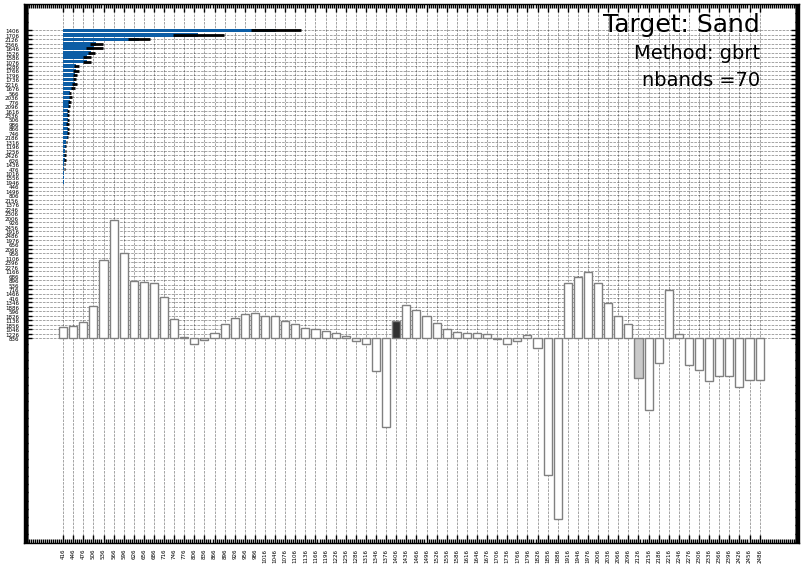

In [10]:
show_important_features_for ('Sand', model_details, feature_scores, 100, 500, 2)

### Cubist

 Sand -> [ r2 - **0.60**, Spec - fod_log, n_bands -10]   <br/><br/>
***Description***:To obtain the best model for sand using cubist method we trained the model on the first order derivative of the logarithmic transformed spectra which is resampled to 10 bands.


In [11]:
sand_model_cubist = Cubist( n_committees = 10, n_rules = 10, random_state = 42) 
sand_model_cubist.fit(fod_log[10],  T[0])

Cubist(n_committees=10, n_rules=10, random_state=42)

In [12]:
feature_scores['Sand'] = permutation_importance(sand_model_cubist, fod_log[10], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'cubist', 'spec': fod_log[10], 'spec_proc': 'fod_log', 'n_bands': 10}

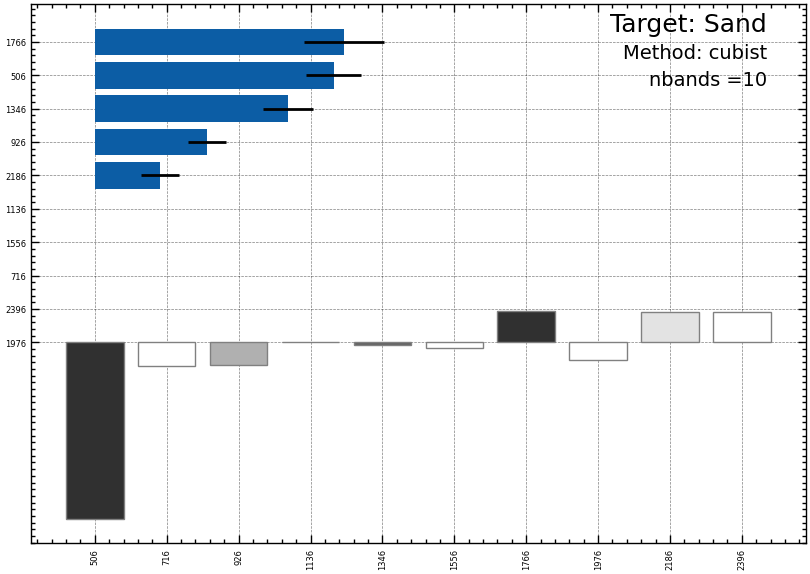

In [13]:
show_important_features_for ('Sand', model_details, feature_scores, 6, 4, 2)

## Silt

### GBRT

Silt -> [ r2 - **0.48**, Spec - fod, n_bands - 27]   <br/><br/>
***Description***:To obtain the best model for silt using gbrt method we trained the model on the
 first order derivative of the smoothed spectra  which is resampled to 27 bands.


In [14]:
silt_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50, random_state = 42) 
silt_model_gbrt.fit(fod_sampled[27], T[1])

GradientBoostingRegressor(n_estimators=50, random_state=42)

In [15]:
feature_scores['Silt'] = permutation_importance(silt_model_gbrt, fod_sampled[27], T[1], n_repeats=10, random_state=0)
model_details['Silt'] = {'method': 'gbrt', 'spec': fod_sampled[27], 'spec_proc': 'fod', 'n_bands': 27}

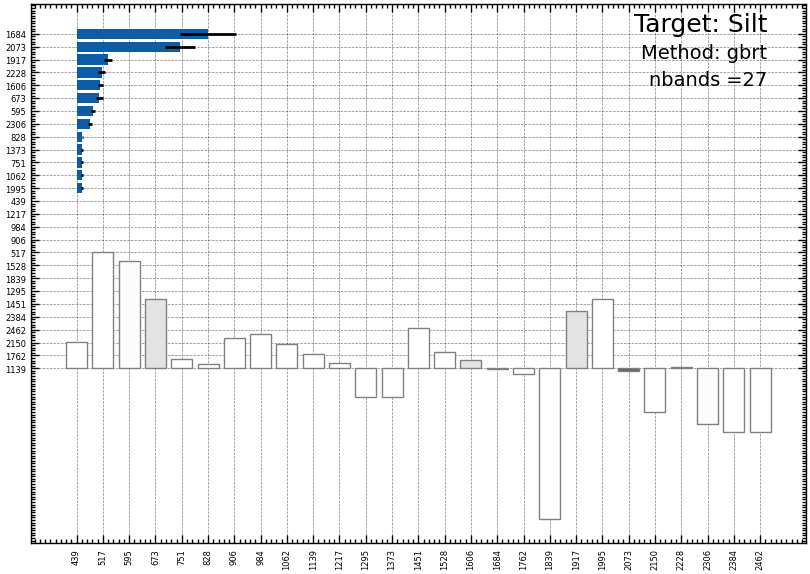

In [16]:
show_important_features_for ('Silt', model_details, feature_scores, 15, 100, 2)

## Clay 

### Cubist

Clay -> [ r2 - **0.66**, Spec - fod, n_bands -10]   <br/><br/>
***Description***:To obtain the best model for clay using cubist method we trained the model on the first order derivative of the smoothed spectra which is resampled to 10 bands.


In [17]:
clay_model_cubist = Cubist( n_committees = 5, n_rules = 10, random_state = 42) 
clay_model_cubist.fit(fod_sampled[10],  T[2])

Cubist(n_committees=5, n_rules=10, random_state=42)

In [18]:
feature_scores['Clay'] = permutation_importance(clay_model_cubist, fod_sampled[10], T[2], n_repeats=10, random_state=0)
model_details['Clay'] = {'method': 'cubist', 'spec': fod_sampled[10], 'spec_proc': 'fod', 'n_bands': 10}

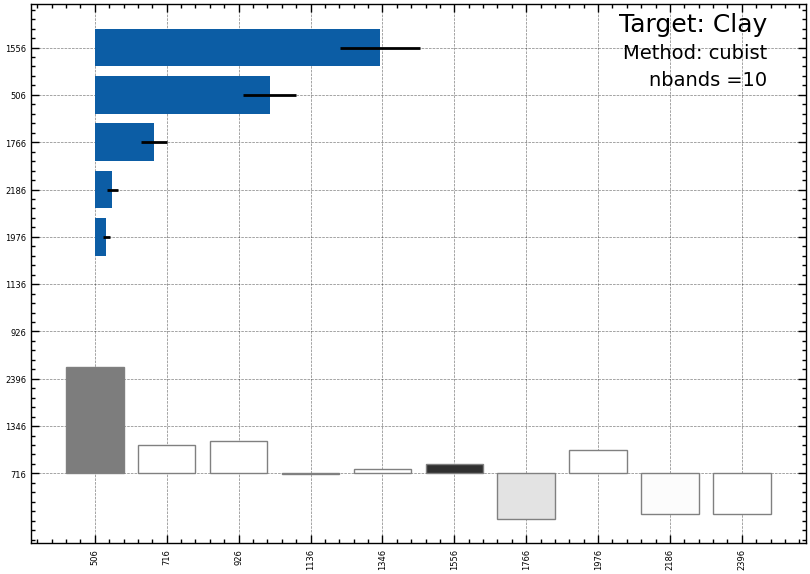

In [19]:
show_important_features_for ('Clay', model_details, feature_scores, 5, 12, 2)

## TOC

### Cubist

TOC -> [ r2 - **0.57**, Spec - fod_log, n_bands - 15]   <br/><br/>
***Description***:To obtain the best model for TOC using cubist method we trained the model on the first order derivative of the  logarithmic transformed spectra which is resampled to 15 bands.


In [20]:
TOC_model_cubist = Cubist(n_committees = 10, n_rules = 10) 
TOC_model_cubist.fit(fod_log[15],  T[3])

Cubist(n_committees=10, n_rules=10)

In [21]:
feature_scores['TOC'] = permutation_importance(TOC_model_cubist, fod_log[15], T[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'cubist', 'spec': fod_log[15], 'spec_proc': 'fod_log', 'n_bands': 15}

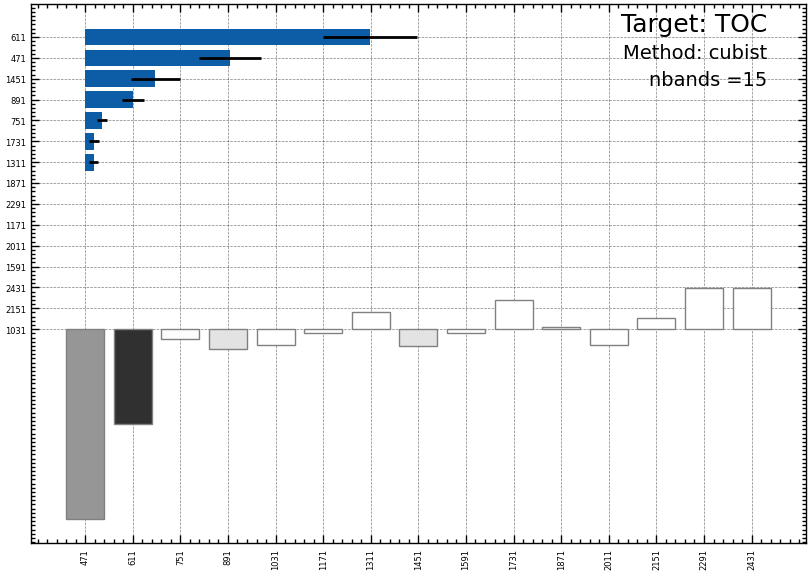

In [22]:
show_important_features_for ('TOC', model_details, feature_scores, 10, 8, 2)

## CaCO3

### GBRT

CaCO3 -> [ r2 - **0.68**, Spec - cr, n_bands - 80]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using gbrt method we trained the model on the
 continuum removal of the spectra which is resampled to 80 bands.


In [23]:
CaCO3_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 50, random_state = 42) 
CaCO3_model_gbrt.fit(sampled_cr[80], T[4])

GradientBoostingRegressor(max_depth=5, n_estimators=50, random_state=42)

In [24]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_gbrt, sampled_cr[80], T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'gbrt', 'spec': sampled_cr[80], 'spec_proc': 'cr', 'n_bands': 80}

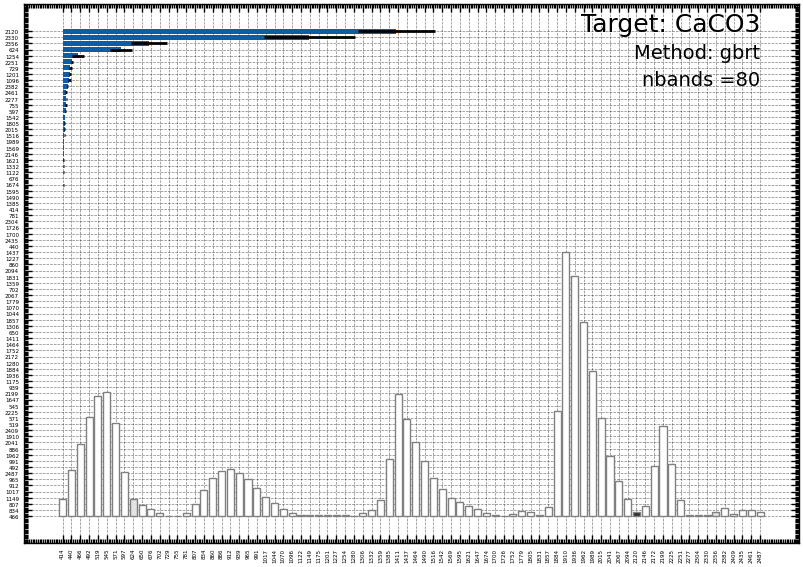

In [25]:
show_important_features_for ('CaCO3', model_details, feature_scores, 80, 300, 2)

In [26]:
# with open ('Feature.pickle', 'wb') as file:
#     pickle.dump(feature_scores, file)
     

In [27]:
# with open ('Models.pickle', 'wb') as file:
#     pickle.dump(model_details, file)